In [1]:
import numpy as np
import matplotlib.pyplot as plt

(649, 998, 3)
(649, 998)


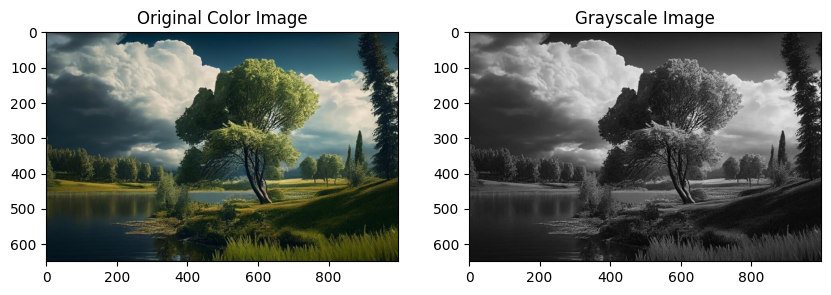

In [2]:
img = plt.imread('image/nature.jpg')
print(img.shape)
# img = img[:,:,1]
gray_image = np.mean(img, axis=-1)
print(gray_image.shape)
# plt.imshow(img)
# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Color Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

In [3]:
nk = np.zeros(256)
height, width = gray_image.shape
# print(gray_image[1][4])
# print(gray_image.shape)
for i in range(height):
    for j in range(width):
        nk[int(gray_image[i][j])] += 1
# print(histogram)

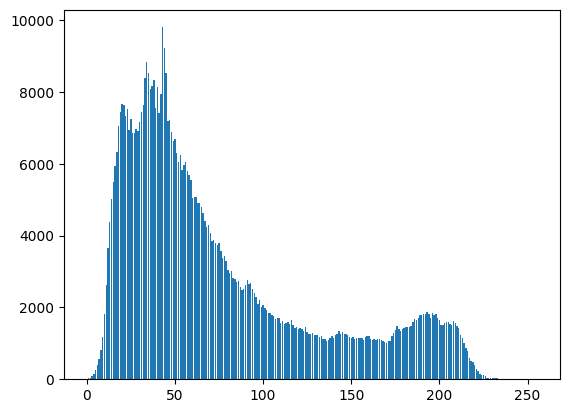

In [4]:
plt.bar(np.arange(256), nk)
plt.show()

In [5]:
pdf = np.zeros(256)
total_bits = height * width
for i in range(256):
    pdf[i] = nk[i]/total_bits

# print(np.sum(pdf))
print(pdf)

[2.16148784e-05 5.71250359e-05 6.17567956e-05 1.60567668e-04
 2.37763663e-04 4.02963091e-04 6.11392276e-04 8.63051218e-04
 1.25829471e-03 1.80021059e-03 2.78677540e-03 4.04352619e-03
 5.63839543e-03 6.74847384e-03 7.73195080e-03 8.49001547e-03
 9.17242806e-03 9.77301290e-03 1.08861791e-02 1.15083789e-02
 1.18434095e-02 1.17801088e-02 1.13200206e-02 1.16102776e-02
 1.07132601e-02 1.11733482e-02 1.05851148e-02 1.06036418e-02
 1.07441385e-02 1.06669425e-02 1.10668178e-02 1.14836761e-02
 1.17924601e-02 1.29442244e-02 1.36482518e-02 1.31665488e-02
 1.24625213e-02 1.26246329e-02 1.28454135e-02 1.16658587e-02
 1.25520687e-02 1.14450781e-02 1.22834266e-02 1.51335028e-02
 1.42241339e-02 1.31526535e-02 1.10853448e-02 1.11347502e-02
 1.06329763e-02 1.02408206e-02 1.03133849e-02 9.74367842e-03
 9.33145181e-03 9.62479659e-03 8.98406983e-03 9.22492134e-03
 9.32836397e-03 8.94392792e-03 8.80188729e-03 8.55794795e-03
 7.81069072e-03 7.84774480e-03 7.85546440e-03 7.55903178e-03
 7.57138314e-03 7.400008

In [6]:
cdf = np.zeros(256)
cdf[0] = pdf[0]
for i in range(1,256):
    cdf[i] = cdf[i-1] + pdf[i]

print(cdf[255])

1.0000000000000002


In [7]:
histogram_equ = np.zeros(256)
for i in range(256):
    histogram_equ[i] = int(cdf[i]*255)
print(histogram_equ)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   3.   4.   6.
   8.  10.  12.  15.  18.  20.  23.  26.  29.  32.  35.  38.  41.  43.
  46.  49.  52.  55.  58.  61.  64.  68.  71.  74.  77.  80.  84.  86.
  90.  93.  97. 100. 103. 106. 109. 111. 114. 117. 119. 121. 124. 126.
 128. 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 150. 152. 154.
 155. 157. 158. 160. 161. 163. 164. 166. 167. 168. 169. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 190. 191. 192. 193. 193. 194. 195. 195. 196. 197. 197.
 198. 198. 199. 200. 200. 201. 201. 202. 203. 203. 204. 204. 205. 205.
 206. 206. 207. 207. 208. 208. 209. 209. 210. 210. 210. 211. 211. 212.
 212. 213. 213. 214. 214. 215. 215. 216. 216. 217. 217. 218. 218. 219.
 219. 219. 220. 220. 221. 221. 222. 222. 223. 223. 224. 224. 224. 225.
 225. 226. 226. 226. 227. 227. 228. 228. 229. 230. 230. 231. 231. 232.
 232. 233. 233. 234. 235. 235. 236. 237. 238. 238. 239. 240. 240. 241.
 242. 

In [8]:
equlized_img = np.zeros((int(height), int(width)), dtype=np.uint8)
print(equlized_img.shape)
print(np.max(histogram_equ))
# print(np.max(gray_image))
for i in range(height):
    for j in range(width):
        equlized_img[i][j] = histogram_equ[int(gray_image[i][j])]
        # histogram_equ[gray_image[i][j]]

print(equlized_img)

(649, 998)
255.0
[[174 175 178 ...  64  41  26]
 [175 177 179 ...  55  32  20]
 [177 178 180 ...  49  32  23]
 ...
 [ 18  18  18 ...  10  35  55]
 [ 18  18  18 ...   4  15  38]
 [ 18  18  18 ...   8  20  43]]


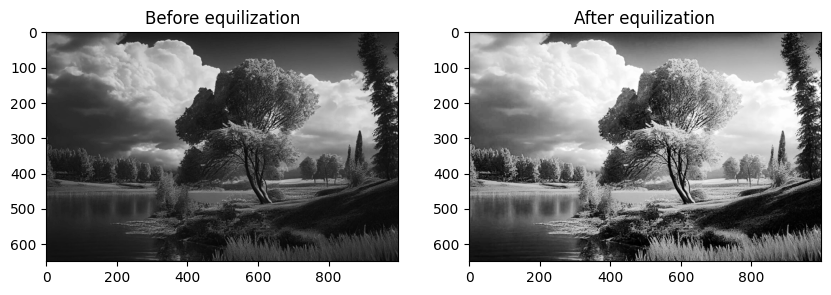

In [9]:
# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Before equilization')

plt.subplot(1, 2, 2)
plt.imshow(equlized_img, cmap='gray')
plt.title('After equilization')

plt.show()


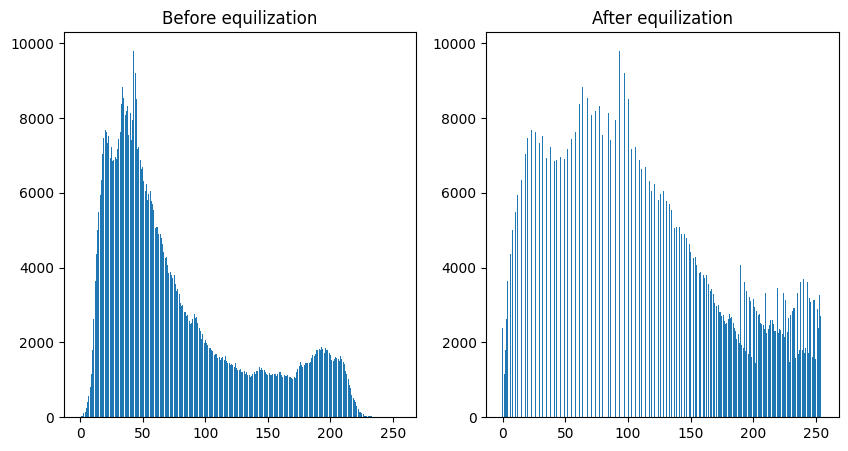

In [10]:
nk1 = np.zeros(256)
# print(gray_image[1][4])
# print(gray_image.shape)
for i in range(height):
    for j in range(width):
        nk1[int(equlized_img[i][j])] += 1

# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(256), nk)
plt.title('Before equilization')

plt.subplot(1, 2, 2)
plt.bar(np.arange(256), nk1)
plt.title('After equilization')

plt.show()
